# Problema das N Rainhas

♕⬜⬜⬜⬜⬜⬜⬜
⬜♕⬜⬜⬜⬜⬜⬜
⬜⬜♕⬜⬜⬜⬜⬜
⬜⬜⬜♕⬜⬜⬜⬜
⬜⬜⬜⬜♕⬜⬜⬜
⬜⬜⬜⬜⬜♕⬜⬜
⬜⬜⬜⬜⬜⬜♕⬜
⬜⬜⬜⬜⬜⬜⬜♕



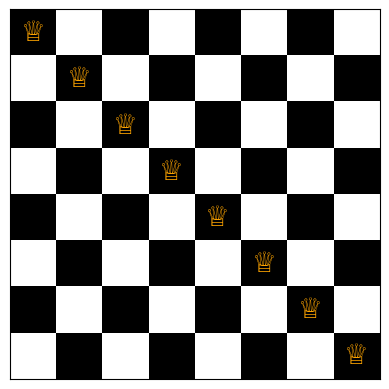

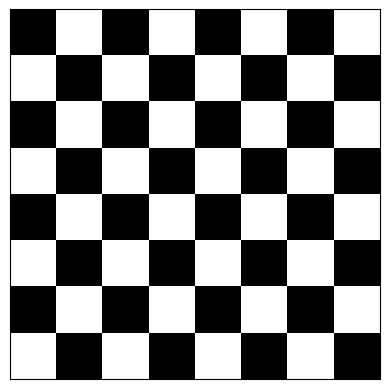

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
solucao = np.array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int)

#Básico
def printar(solucao):
    n = len(solucao)
    for i in range(n):
        for j in range(n):
            if solucao[j] == i:
                print('\u2655', end='')
            else:
                print('\u2B1C', end='')
        print()
    print()


#Avançado
def plotar(solucao):    
    n = len(solucao)
    dx, dy = 0.015, 0.05 
    x = np.arange(-4.0, 4.0, dx) 
    y = np.arange(-4.0, 4.0, dy) 
    X, Y = np.meshgrid(x,y) 
    min_max = np.min(x), np.max(x), np.min(y), np.max(y) 
    res = np.add.outer(range(n), range(n))%2 
    plt.imshow(res, cmap="binary_r")
    plt.xticks([])
    plt.yticks([])
    for i in range(n):
        if solucao[i] != -1:
            plt.text(i, solucao[i], '\u2655', color="orange", fontsize=20, ha="center", va="center")
    plt.show()

printar(solucao)
plotar(solucao)
plotar([-1]*8)


In [11]:
def avaliar(solucao):
    '''Retorna o número de ataques que a solução possui. Considerando a
    apenas as diagonais, não é necessário verificar as linhas e colunas, pois
    a solução é garantida de ser uma permutação de 0 a n-1.'''
    ataques = 0
    n = len(solucao)
    for i in range(n):
        if solucao[i] < 0:
            continue
        for j in range(i+1, n):            
            if solucao[j] < 0:
                continue
            if abs(solucao[i] - solucao[j]) == j - i:
                ataques += 1
    return ataques  

In [12]:

def forca_bruta(n=8):
    melhor_solucao = np.array(range(n), dtype=int)
    menor_ataques = avaliar(melhor_solucao)
    for solucao in itertools.permutations(range(n)):
        ataques = avaliar(solucao)
        if ataques < menor_ataques:
            menor_ataques = ataques
            melhor_solucao = solucao
            if ataques == 0:
                break
    return melhor_solucao
solucao = forca_bruta()
printar(solucao)

♕⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜♕⬜
⬜⬜⬜⬜♕⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜♕
⬜♕⬜⬜⬜⬜⬜⬜
⬜⬜⬜♕⬜⬜⬜⬜
⬜⬜⬜⬜⬜♕⬜⬜
⬜⬜♕⬜⬜⬜⬜⬜



In [13]:
def ha_ataque(coluna, solucao):
    for i in range(coluna):
        if abs(solucao[i] - solucao[coluna]) == coluna - i:
            return True
    return False

def coloca(linha , coluna, solucao, usados):
    solucao[coluna] = linha
    usados[linha] = True
    if not ha_ataque(coluna, solucao):        
        if coluna == len(solucao) - 1:
            return True
        for i in range(len(solucao)):
            if not usados[i]:
                if coloca(i, coluna+1, solucao, usados):
                    return True
    usados[linha] = False
    return False


def forca_bruta_otimizada(n=8):    
    solucao = np.full(n, -1, dtype=int)
    usados = np.full(n, False, dtype=bool)        
    for linha in range(n):
        if coloca(linha,0, solucao, usados):
            break
    return solucao

In [18]:
sol = forca_bruta_otimizada(8)
printar(sol)

♕⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜♕⬜
⬜⬜⬜⬜♕⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜♕
⬜♕⬜⬜⬜⬜⬜⬜
⬜⬜⬜♕⬜⬜⬜⬜
⬜⬜⬜⬜⬜♕⬜⬜
⬜⬜♕⬜⬜⬜⬜⬜



In [19]:
for n in range(8, 12):
    print(n)
    %timeit -n1 -r3 forca_bruta(n)
    %timeit -n1 -r3 forca_bruta_otimizada(n)    
    print()

8
10.8 ms ± 282 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
566 µs ± 18.2 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)

9
35.6 ms ± 316 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
237 µs ± 10.3 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)

10
315 ms ± 6.63 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
699 µs ± 22.3 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)

11
2.84 s ± 14.1 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
376 µs ± 10.4 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)



In [20]:
def aleatoria(n=8, max_iter=10000):
    solucao = np.array(range(n), dtype=int)
    melhor_solucao = np.array(range(n), dtype=int)    
    menor_ataques = avaliar(melhor_solucao)
    for _ in range(max_iter):
        np.random.shuffle(solucao)
        ataques = avaliar(solucao)
        if ataques < menor_ataques:
            menor_ataques = ataques
            melhor_solucao[:] = solucao[:]
            if ataques == 0:
                print('Solução encontrada!')
                break            
    return melhor_solucao, menor_ataques

solucao,limite_inferior = aleatoria(15)
print(limite_inferior)
printar(solucao)

2
⬜⬜⬜⬜♕⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜♕⬜⬜⬜⬜
♕⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜♕
⬜⬜⬜⬜⬜⬜⬜⬜⬜♕⬜⬜⬜⬜⬜
⬜♕⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜♕⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜♕⬜
⬜⬜⬜⬜⬜⬜⬜♕⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜♕⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜♕⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜♕⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜♕⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜♕⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜♕⬜⬜⬜



In [21]:
for n in range(8, 11):
    print(n)
    %timeit -n1 -r1 aleatoria(n)
    print()

8
Solução encontrada!
7.54 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

9
Solução encontrada!
21.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

10
Solução encontrada!
206 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)



In [23]:
def gulosa(n=8):
    solucao = np.full(n,-1, dtype=int)
    usadas = np.full(n, False, dtype=bool)
    limite_inferior = 0
    for coluna in range(n):
        melhor_linha = -1
        menor_ataques = n
        for linha in range(n):
            if not usadas[linha]:
                solucao[coluna] = linha
                av = avaliar(solucao)
                if av < menor_ataques:
                    menor_ataques = av
                    melhor_linha = linha
                    if menor_ataques == limite_inferior:
                        break
        solucao[coluna] = melhor_linha
        usadas[melhor_linha] = True
        limite_inferior = menor_ataques
    return solucao, limite_inferior
solucao,limite_inferior = gulosa(8)
print(limite_inferior)
printar(solucao)

4
♕⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜♕⬜⬜⬜⬜
⬜♕⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜♕⬜⬜⬜
⬜⬜♕⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜♕⬜⬜
⬜⬜⬜⬜⬜⬜⬜♕
⬜⬜⬜⬜⬜⬜♕⬜



In [25]:
def gulosa_randomizada(n=8):
    solucao = np.full(n,-1, dtype=int)
    usadas = np.full(n, False, dtype=bool)
    limite_inferior = 0
    colunas = np.arange(n,dtype=int)
    linhas = np.arange(n,dtype=int)
    np.random.shuffle(colunas)
    for coluna in colunas:
        melhor_linha = -1
        menor_ataques = n
        np.random.shuffle(linhas)
        for linha in linhas:
            if not usadas[linha]:
                solucao[coluna] = linha
                av = avaliar(solucao)
                if av < menor_ataques:
                    menor_ataques = av
                    melhor_linha = linha
                    if menor_ataques == limite_inferior:
                        break
        solucao[coluna] = melhor_linha
        usadas[melhor_linha] = True            
        limite_inferior = menor_ataques
    return solucao, limite_inferior

def gulosa_randomizada_repetida(n=8, max_iter=1000):
    melhor_solucao = np.full(n,-1, dtype=int)
    menor_ataques = n
    for _ in range(max_iter):
        solucao, ataques = gulosa_randomizada(n)
        if ataques < menor_ataques:
            menor_ataques = ataques
            melhor_solucao[:] = solucao[:]
            if menor_ataques == 0:
                print('Solução encontrada!')
                break
    return melhor_solucao, menor_ataques

# solucao,ataques = gulosa_randomizada(8)
solucao,ataques = gulosa_randomizada_repetida(8)
print(ataques)
printar(solucao)

Solução encontrada!
0
⬜⬜⬜♕⬜⬜⬜⬜
⬜⬜⬜⬜⬜♕⬜⬜
⬜⬜⬜⬜⬜⬜⬜♕
⬜⬜♕⬜⬜⬜⬜⬜
♕⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜♕⬜
⬜⬜⬜⬜♕⬜⬜⬜
⬜♕⬜⬜⬜⬜⬜⬜



In [26]:
for n in range(8, 11):
    print(n)
    %timeit -n1 -r1 gulosa_randomizada_repetida(n)
    print()

8
Solução encontrada!
1.27 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

9
Solução encontrada!
1.17 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

10
Solução encontrada!
3.94 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)



In [48]:
def avaliar_ij(solucao, i, j):
    ataques = 1 if abs(solucao[i] - solucao[j]) == j-i else 0    
    for k in range(len(solucao)):
        if k != i and k != j:
            if abs(solucao[i] - solucao[k]) == abs(i-k): 
                ataques += 1
            if abs(solucao[j] - solucao[k]) == abs(j-k):
                ataques += 1
    return ataques

def melhorar(solucao, ataques):
    n = len(solucao)
    for i in range(n):
        for j in range(i+1, n):
            d0 = avaliar_ij(solucao, i, j)
            if d0 == 0:
                continue
            solucao[i], solucao[j] = solucao[j], solucao[i]
            delta = avaliar_ij(solucao, i, j) - d0
            if delta < 0:
                # assert avaliar(solucao) == ataques + delta, f"delta incorreto! ({i},{solucao[i]}) ({j},{solucao[j]})" # sanity check 
                return True, ataques + delta
            solucao[i], solucao[j] = solucao[j], solucao[i]
    return False, ataques

def hill_climbing(solucao):
    ataques = avaliar(solucao)
    while True:
        melhorou, ataques = melhorar(solucao, ataques)
        if not melhorou or ataques == 0:
            break
        print(ataques, end=' \r')
    print()
    return solucao, ataques

# solucao, ataques = aleatoria(100,10)
solucao, ataques = gulosa(100)
# solucao, ataques = gulosa_randomizada(100)
solucao, ataques = hill_climbing(solucao)
print(ataques)
# printar(solucao)


1  
0
